# Exploratory Data Analysis (EDA) Introduction

Before diving into feature engineering or model training, it's essential to develop a thorough understanding of the dataset. This notebook focuses on exploratory data analysis (EDA) to identify patterns, spot anomalies, and uncover meaningful insights. The findings here will guide our decisions in the preprocessing, feature selection, and modeling phases of the project.

In [14]:
import pandas as pd

df = pd.read_csv('../Data/WELFake_Dataset.csv')

if not df.empty:
    print('✅ Data read successfully')
    print(df.head())
else:
    print('❌ Data reading unsucessful')

✅ Data read successfully
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


## Dataset Overview

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [16]:
df.describe(include = 'all')

,Unnamed: 0,title,text,label
count,72134.000000,71576,72095,72134.000000
unique,NaN,62347,62718,NaN
top,NaN,Factbox: Trump fills top jobs for his administ...,,NaN
freq,NaN,14,738,NaN
mean,36066.500000,NaN,NaN,0.514404
std,20823.436496,NaN,NaN,0.499796
min,0.000000,NaN,NaN,0.000000
25%,18033.250000,NaN,NaN,0.000000
50%,36066.500000,NaN,NaN,1.000000
75%,54099.750000,NaN,NaN,1.000000


In [17]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

These initial exploratory commands provide valuable insight into the structure and quality of the dataset. The dataset comprises **72,134 news articles**, each characterized by four variables: an unnamed index column (serving as an article ID), the article's title, the full text, and a binary label indicating whether the article is real or fake. Notably, **558** entries are missing titles and **39** are missing text. Addressing these missing values will be an essential part of the data preprocessing phase, and it is likely that records lacking core textual information will be removed to maintain the integrity of the analysis.

## Data Visualiations

### Article Text and Title Length Analysis

In [18]:
#Creating two new columns for text and title length
df['text_length'] =  df['text'].fillna('').str.split().apply(len)
df['title_length'] = df['title'].fillna('').str.split().apply(len)

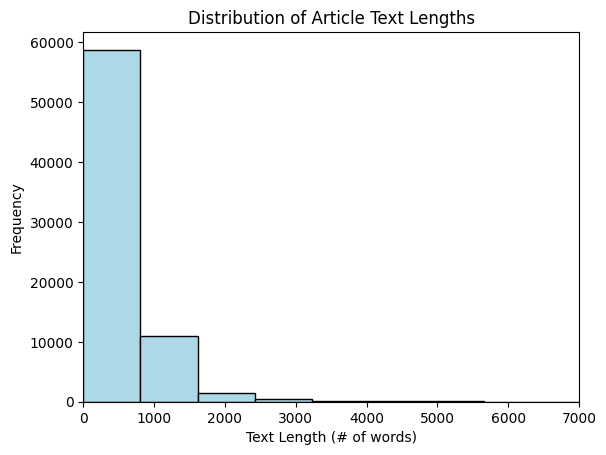

In [19]:
import matplotlib.pyplot as plt

#Creates a graph to show the distrubution of words in an article
plt.hist(df['text_length'], bins = 30, color = 'lightblue', edgecolor = 'black')
plt.title('Distribution of Article Text Lengths')
plt.xlabel('Text Length (# of words)')
plt.ylabel('Frequency')
plt.xlim(0,7000)
plt.show()

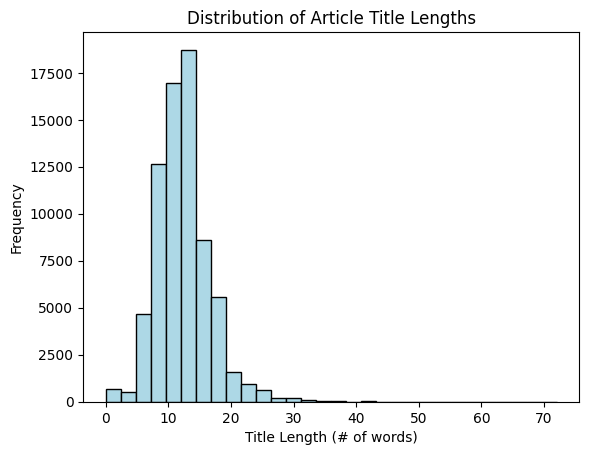

In [20]:
#Creates a graph to show the distrubution of words in a title
plt.hist(df['title_length'], bins = 30, color = 'lightblue', edgecolor = 'black')
plt.title('Distribution of Article Title Lengths')
plt.xlabel('Title Length (# of words)')
plt.ylabel('Frequency')
plt.show()

### Article Text and Title Length Histogram Insights

These first two histograms illustrate the distribution of word counts in each article’s **title** and **full text**. The histogram for article text length reveals a **heavily right-skewed distribution**, with the majority of articles containing fewer than **1,000 words**. However, the presence of a long tail suggests that a small number of articles exceed **6,000 words** in length. This indicates that the dataset includes a wide range of article lengths, most are relatively short, while a few outliers are substantially longer, potentially representing aggregated reports or verbose opinion pieces.

In contrast, the histogram for article title lengths displays a **symmetric, bell-shaped distribution**, centered around **10 to 15 words**. Most titles fall within the range of **5 to 20 words**, with very few exceeding **30 to 40 words**. This suggests a high degree of consistency in title formatting across the dataset, likely reflecting editorial standards or platform-specific guidelines. Overall, the title data appears to follow a more controlled and uniform structure, whereas the article body lengths exhibit greater variability.

### Number of Real & Fake Articles Analysis

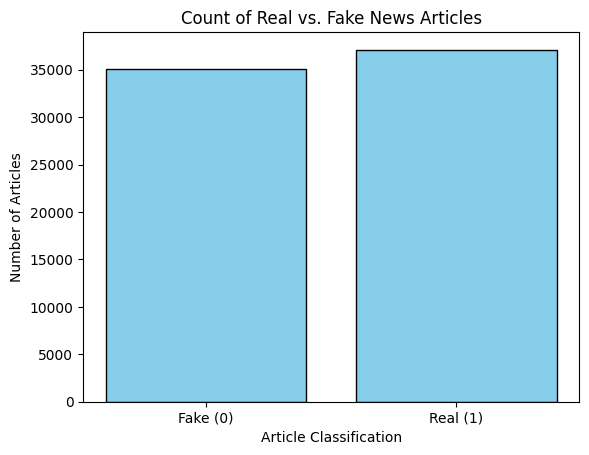

In [21]:
#Ensures that 0 will come before 1 on the graph
label_counts = df['label'].value_counts().sort_index()

#Create a graph showing the counts of real vs. fake news articles
plt.bar(['Fake (0)', 'Real (1)'], label_counts.values, color = 'skyblue', edgecolor = 'black')
plt.title('Count of Real vs. Fake News Articles')
plt.xlabel('Article Classification')
plt.ylabel('Number of Articles')
plt.show()

### Number of Real & Fake Articles Barplot Analysis

This bar chart displays the distribution of article classifications within the dataset, comparing the number of real and fake news articles. The dataset appears to be relatively balanced, with approximately **35,000 fake articles** and **37,000 real articles**. This near-even distribution is beneficial for supervised learning tasks, as it reduces the risk of introducing bias during model training due to class imbalance. A balanced dataset ensures that a classification model has an equal opportunity to learn patterns associated with both real and fake news, which is essential for achieving robust and generalizable performance.



### Top Words in Real Vs. Fake Articles Analysis

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

#Creates new dataframes with text for real and fake articles respectively
fake_texts = df[df['label'] == 0]['text'].fillna('')
real_texts = df[df['label'] == 1]['text'].fillna('')

#Initializes a count vectorizer
vectorizer = CountVectorizer(stop_words= 'english', max_features = 5000)

#Creates dictionary of fake words + word counts
fake_matrix = vectorizer.fit_transform(fake_texts)
fake_vocab = vectorizer.get_feature_names_out()
fake_counts = fake_matrix.sum(axis = 0).A1
fake_freq = dict(zip(fake_vocab, fake_counts))

#Creates dictionary of real words + words counts
real_matrix = vectorizer.fit_transform(real_texts)
real_vocab = vectorizer.get_feature_names_out()
real_counts = real_matrix.sum(axis = 0).A1
real_freq = dict(zip(real_vocab, real_counts))

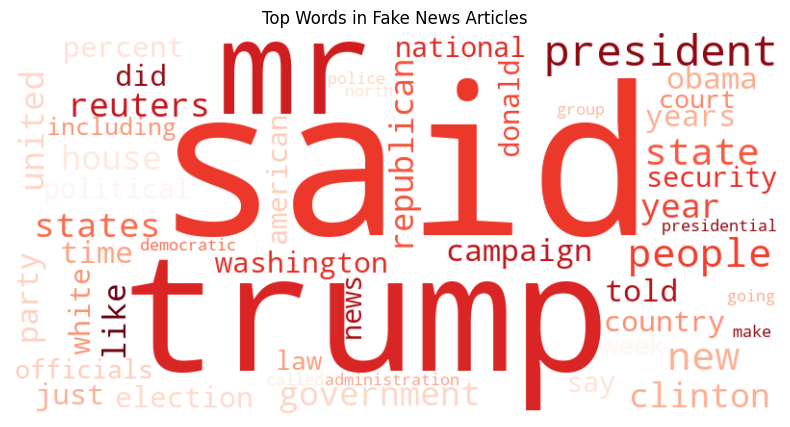

In [23]:
from wordcloud import WordCloud

#Creates a wordcloud of words that displays the top 35 words that appear in fake news articles
fake_wc = WordCloud(width = 800, height = 400, max_words= 50, background_color= 'white', colormap = 'Reds').generate_from_frequencies(fake_freq)

plt.figure(figsize=(10,5))
plt.imshow(fake_wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Fake News Articles')
plt.show()

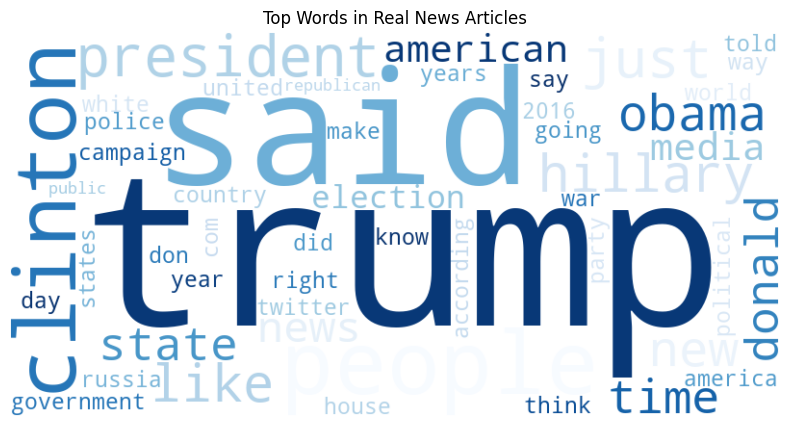

In [24]:
real_wc = WordCloud(width = 800, height = 400, max_words= 50, background_color= 'white', colormap = 'Blues').generate_from_frequencies(real_freq)

#Creates a wordcloud of words that displays the top 35 words that appear in real news articles
plt.figure(figsize=(10,5))
plt.imshow(real_wc, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top Words in Real News Articles')
plt.show()

### Top Words in Real Vs. Fake Articles Wordcloud Analysis

These two word clouds visualize the most frequently occurring words in **fake** and **real** news articles, offering insight into common language patterns across the two classes. While there is notable overlap in some of the most prominent terms such as **"said"**, **"trump"**, **"people"**, and **"government"** there are also important distinctions that suggest differences in tone, emphasis, and narrative focus.

In fake news articles, words like **"mr"**, **"reuters"**, **"state"**, **"united"**, and **"house"** appear more prominently. The frequent use of **"mr"** and **"reuters"** may indicate attempts to mimic journalistic conventions or reference authority figures and sources. Additionally, the emphasis on terms like **"state"**, **"president"**, and **"government"** reflects a strong focus on institutions and political leadership, potentially aiming to provoke emotional or ideological responses from readers.

In contrast, real news articles exhibit a more diverse and contextually grounded vocabulary. Words such as **"according"**, **"media"**, **"russia"**, **"twitter"**, and **"2016"** suggest the inclusion of time-specific reporting and attribution practices common in professional journalism. The prominence of **"according"** in particular points to an effort to cite sources and maintain objectivity.

Overall, while both **fake** and **real** articles cover overlapping political topics and figures, **real news articles** appear to be more rooted in reported events and sourcing, whereas **fake news articles** may rely more on names, institutions, and generic political framing to build credibility or incite reaction.

### Sentiment Analysis for Real & Fake Articles

In [25]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

#Downloads vocabulary and rules to analyze sentiment
nltk.download('vader_lexicon')

#Initializes a VADER sentiment analyzer object
sia = SentimentIntensityAnalyzer()

#Creates samples of real and fake documents to analyze sentiment of each category
fake_sample = df[df['label'] == 0].sample(n = 2000, random_state= 42)
real_sample = df[df['label'] == 1].sample(n = 2000, random_state= 42)

#Creates a sentiment column for both datagrames based on the text of the article
fake_sample['sentiment'] = (
    fake_sample['text'].fillna('').apply(lambda t: sia.polarity_scores(t)['compound'])
)

real_sample['sentiment'] = (
    real_sample['text'].fillna('').apply(lambda t: sia.polarity_scores(t)['compound'])
)

#Gets mean sentiment scores for real and fake articles
real_sample_sentiment_mean = real_sample['sentiment'].mean()
fake_sample_sentiment_mean = fake_sample['sentiment'].mean()


print(f'Overall sentiment of Real articles: {real_sample_sentiment_mean}')
print(f'Overall sentiment of Fake articles: {fake_sample_sentiment_mean}')
print('Note: overall sentiment score is a weighted average from -1 (very negative) to +1 (very positive)')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tylerkatz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Overall sentiment of Real articles: -0.05400825
Overall sentiment of Fake articles: 0.0685899
Note: overall sentiment score is a weighted average from -1 (very negative) to +1 (very positive)


### Sentiment Analysis for Real & Fake Articles Insight

To assess the overall emotional tone of articles in the dataset, sentiment analysis was conducted using a stratified sample of **2,000 real** and **2,000 fake** news articles. Due to the computational cost of processing all **72,000 records** with a sentiment analysis model, sampling was necessary to ensure timely and efficient evaluation while still maintaining class balance.

The results indicate a measurable difference in average sentiment between the two categories. **Real news articles** exhibited a slightly **negative overall sentiment**, with an average score of **−0.054**, while **fake news articles** showed a slightly **positive sentiment**, averaging **+0.069**. These values are based on VADER's compound sentiment score, which ranges from −1 (very negative) to +1 (very positive).

This subtle contrast suggests that **fake news content may employ more emotionally charged or positively skewed language**, potentially to increase engagement, persuasion, or virality. In contrast, **real news articles tend to adopt a more neutral or slightly negative tone**, possibly reflecting journalistic focus on conflict, problems, or critical reporting.

While the difference in sentiment is not extreme, it aligns with broader observations in media studies that fake news often amplifies emotionally evocative content to capture attention, whereas real journalism prioritizes factual or issue-driven narratives.

## Concluding Thoughts on the Exploratory Data Analysis

The exploratory analysis provided a comprehensive overview of the dataset’s structure, quality, and content characteristics. The dataset consists of **72,134 articles**, with a manageable number of missing values: **558 articles lack titles** and **39 lack full text**. These issues will be addressed during preprocessing to maintain the integrity of the analysis.

The distribution analysis showed that article bodies vary significantly in length, with most containing fewer than **1,000 words** and a small number exceeding **6,000**. In contrast, article titles follow a more consistent pattern, typically ranging from **10 to 15 words**, which suggests a degree of editorial standardization. The dataset is also nearly balanced between real and fake news articles, which is beneficial for building unbiased classification models.

The word cloud visualizations highlighted both overlap and contrast in vocabulary between real and fake articles. **Fake news** content often emphasizes **institutional** or *political* terms in a broad or sensational way, while **real news** articles more frequently include **sourcing language** and **context-specific terminology**. A sample-based sentiment analysis (**2,000 fake** and **2,000 real** articles) revealed that **fake news** articles tend to have a slightly **positive** emotional tone on average, whereas **real news** articles lean slightly **negative** potentially reflecting differences in tone, framing, and journalistic intent.

Altogether, these insights will inform the preprocessing and modeling phases by underscoring the relevance of text length, class balance, word usage patterns, and sentiment as key features. With a solid understanding of the dataset now established, the next step is to begin cleaning and transforming the data to prepare it for machine learning.